# Medical Cost : Insurance Prediction

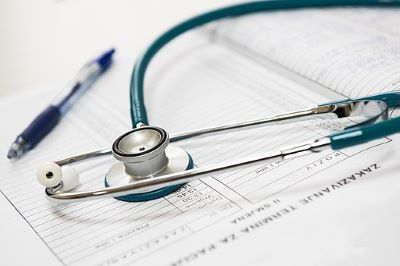

## About Dataset

> - age: age of primary beneficiary

> - sex: insurance contractor gender, female, male

> - bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

> - children: Number of children covered by health insurance / Number of dependents

> - smoker: Smoking

> - region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

> - charges: Individual medical costs billed by health insurance

## Loading the Dependencies

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


## Step 1: Data Understanding

In [4]:
# Loading the Datasets using pandas Library
df = pd.read_csv('insurance.csv')

# Displaying the first 5 records
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Displaying the shape

df.shape

(1338, 7)

In [6]:
print(f'The Dataset has {df.shape[0]} rows, and {df.shape[1]} columns')

The Dataset has 1338 rows, and 7 columns


In [7]:
# Displaying the Statistics

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
# Displaying the information of the Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# Checking the datatypes

df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
# Checking for missing values 

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
# Checking for duplicate records

df.duplicated().sum()

1

In [12]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [13]:
# Checking the duplicate record

df[(df['age']==19) & (df['sex']=='male') & (df['bmi']==30.59)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [14]:
# Removing the duplicate record

df.drop_duplicates(inplace = True)

In [15]:
# Checking the shape again
df.shape

(1337, 7)

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Step 2: Data Wrangling

- This is the process of cleaning or transforming the dataset

In [17]:
# Checking for the minimum and maximum age 

Minimum_age = df['age'].min()
print('Minimum age:', Minimum_age)

Maximum_age = df['age'].max()
print('Maximum age:', Maximum_age)

Minimum age: 18
Maximum age: 64


In [18]:
# Creating a define function for the age column

def age_bracket(age):
    if age <= 25:
        return '18-25'
    elif age <= 35:
        return '26-35'
    elif age <= 45:
        return '36-45'
    elif age <= 55:
        return '46-55'
    else:
        return '>55'
    

In [19]:
# Checking for the minimum and maximum bmi 

Minimum_bmi = df['bmi'].min()
print('Minimum bmi:', Minimum_bmi)

Maximum_bmi = df['bmi'].max()
print('Maximum bmi:', Maximum_bmi)

Minimum bmi: 15.96
Maximum bmi: 53.13


In [20]:
# Creating a define function for the bmi column

def bmi_bracket(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi <= 24.9:
        return 'Normal weight'
    elif bmi <= 39.9:
        return 'Overweight'
    else:
        return 'Obese'

In [21]:
# Applying the function to the age and bmi column respectively

# Age bracket
df['age_bracket'] = df['age'].apply(age_bracket)

# BMI bracket
df['bmi_bracket'] = df['bmi'].apply(bmi_bracket)

In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_bracket,bmi_bracket
0,19,female,27.900,0,yes,southwest,16884.92400,18-25,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,18-25,Overweight
2,28,male,33.000,3,no,southeast,4449.46200,26-35,Overweight
3,33,male,22.705,0,no,northwest,21984.47061,26-35,Normal weight
4,32,male,28.880,0,no,northwest,3866.85520,26-35,Overweight


## Descriptive Statistics

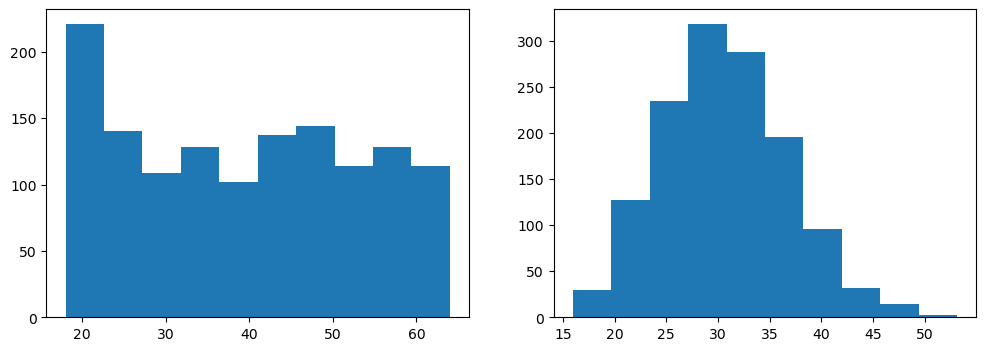

In [23]:
# The distribution of the numerical values

fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0] = axes[0].hist(df['age'])

axes[1] = axes[1].hist(df['bmi'])

male      675
female    662
Name: sex, dtype: int64


([<matplotlib.patches.Wedge at 0x17030e67700>,
 [Text(-0.016800012982034103, 1.0998717014105799, 'male'),
  Text(0.01680011595945443, -1.0998716998376443, 'female')],
 [Text(-0.009163643444745873, 0.5999300189512253, '50.4861651.1%'),
  Text(0.009163699614247869, -0.5999300180932605, '49.5138381.1%')])

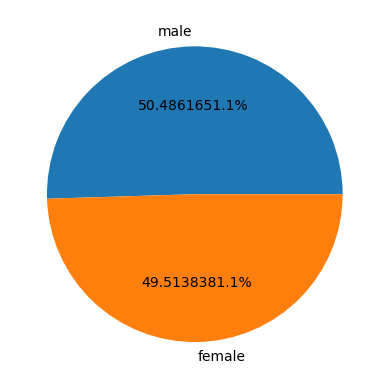

In [24]:
print(df['sex'].value_counts())
labels = ['male', 'female']
plt.pie(df['sex'].value_counts(), labels = labels, autopct = '%f1.1%%')

In [25]:
df['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

([<matplotlib.patches.Wedge at 0x17030ebbf40>,
 [Text(-0.8797849777822367, 0.6602865990376524, 'no'),
  Text(0.8797849468719889, -0.6602866402233593, 'yes')],
 [Text(-0.4798827151539472, 0.36015632674781034, '79.5063561.1%'),
  Text(0.4798826982938121, -0.36015634921274137, '20.4936431.1%')])

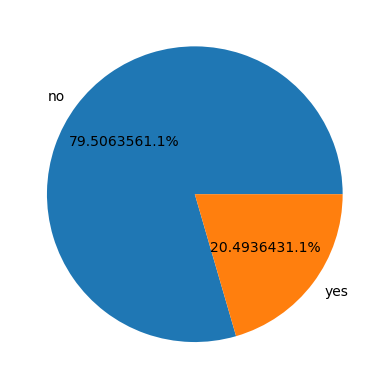

In [26]:
labels = ['no', 'yes']
plt.pie(df['smoker'].value_counts(),labels=labels, autopct = '%f1.1%%')

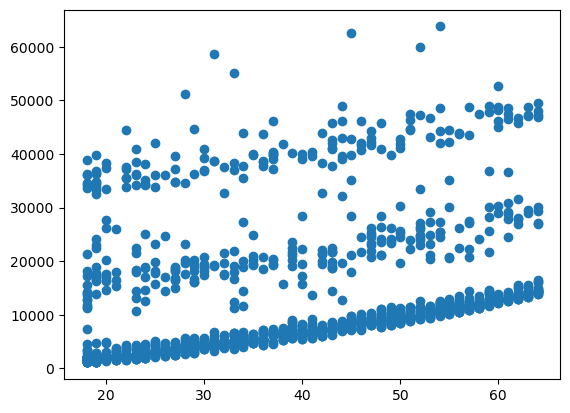

In [27]:
# Age vs charges

plt.scatter(x='age', y='charges', data = df)

<Figure size 1200x600 with 0 Axes>

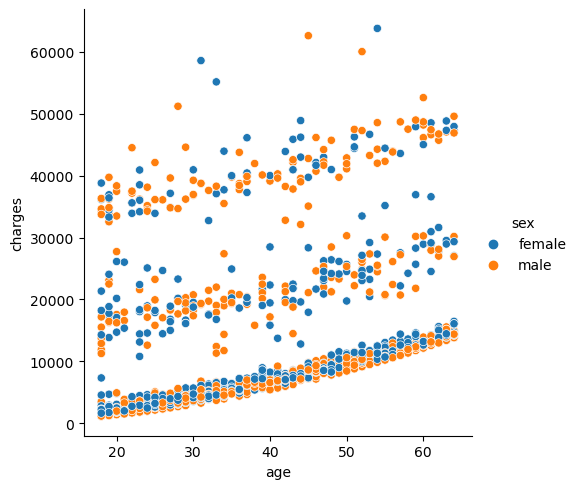

In [28]:
plt.figure(figsize=(12,6))
sns.relplot(x='age', y='charges', hue = 'sex', data=df)

<AxesSubplot:xlabel='age'>

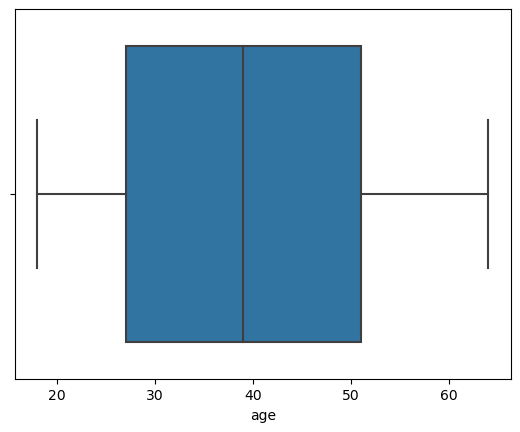

In [29]:
# Checking for outliers

sns.boxplot(df['age'])

<AxesSubplot:xlabel='charges'>

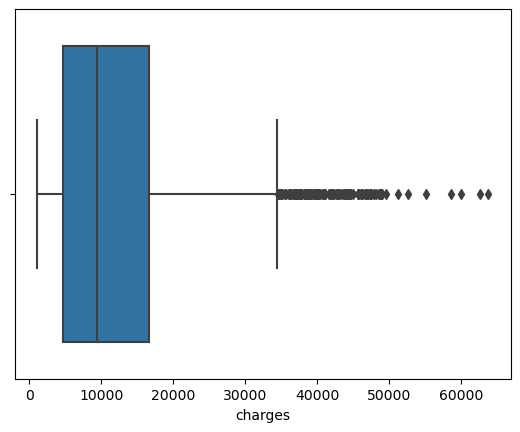

In [30]:
sns.boxplot(df['charges'])

<AxesSubplot:xlabel='bmi'>

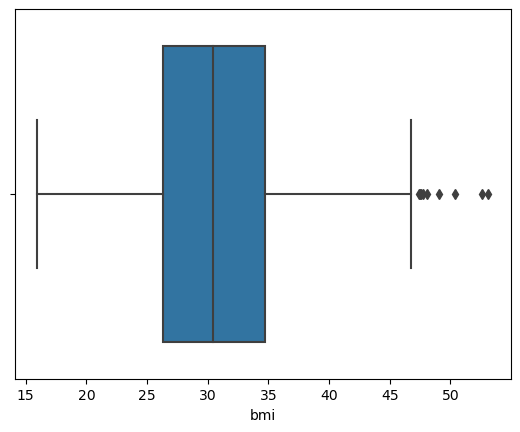

In [31]:
sns.boxplot(df['bmi'])

## Correlation

In [32]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_bracket,bmi_bracket
0,19,female,27.900,0,yes,southwest,16884.92400,18-25,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,18-25,Overweight
2,28,male,33.000,3,no,southeast,4449.46200,26-35,Overweight
3,33,male,22.705,0,no,northwest,21984.47061,26-35,Normal weight
4,32,male,28.880,0,no,northwest,3866.85520,26-35,Overweight


In [33]:
numerical_columns_corr = df.drop(['sex', 'smoker', 'region', 'age_bracket', 'bmi_bracket'], axis = 1)

print(numerical_columns_corr.corr())

               age       bmi  children   charges
age       1.000000  0.109344  0.041536  0.298308
bmi       0.109344  1.000000  0.012755  0.198401
children  0.041536  0.012755  1.000000  0.067389
charges   0.298308  0.198401  0.067389  1.000000


Text(0.5, 1.0, 'correlation coefficient')

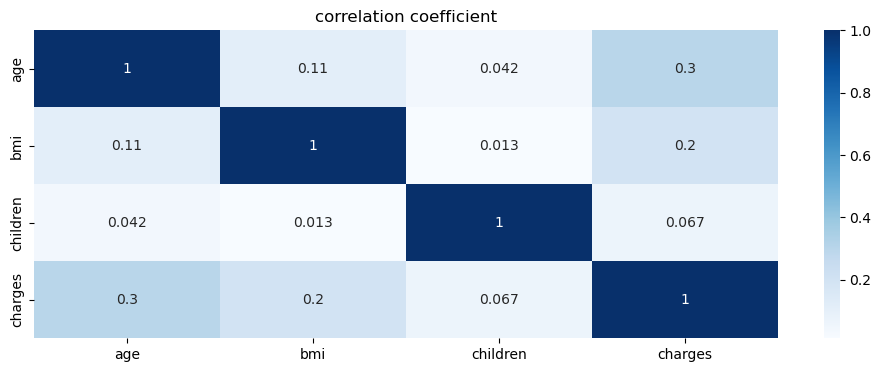

In [34]:
plt.figure(figsize=(12,4))
sns.heatmap(numerical_columns_corr.corr(), annot = True, cmap='Blues')
plt.title('correlation coefficient')

## Data preparation for prediction

In [35]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'age_bracket', 'bmi_bracket'],
      dtype='object')

In [51]:
# Splitting the data into dependent and independent variables
x = df.drop(['charges', 'region', 'age_bracket', 'bmi_bracket'], axis = 1)
y = df.drop(['age', 'sex', 'bmi', 'children', 'smoker', 'region',
       'age_bracket', 'bmi_bracket'], axis = 1)

In [52]:
print(x)
print(y)

      age     sex     bmi  children smoker
0      19  female  27.900         0    yes
1      18    male  33.770         1     no
2      28    male  33.000         3     no
3      33    male  22.705         0     no
4      32    male  28.880         0     no
...   ...     ...     ...       ...    ...
1333   50    male  30.970         3     no
1334   18  female  31.920         0     no
1335   18  female  36.850         0     no
1336   21  female  25.800         0     no
1337   61  female  29.070         0    yes

[1337 rows x 5 columns]
          charges
0     16884.92400
1      1725.55230
2      4449.46200
3     21984.47061
4      3866.85520
...           ...
1333  10600.54830
1334   2205.98080
1335   1629.83350
1336   2007.94500
1337  29141.36030

[1337 rows x 1 columns]


In [53]:
# Encoding the sex column
x['sex'] = df['sex'].map({
    'male': 1,
    'female': 0
})

# Encoding the smoker column
x['smoker'] = df['smoker'].map({
    'yes': 1,
    'no': 0
})

In [54]:
x.head()

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0


In [55]:
scaler = StandardScaler()
scaler

StandardScaler()

In [56]:
# Fit & Transform our x variable
scaledx = scaler.fit_transform(x)
scaledx

array([[-1.44041773, -1.00977099, -0.45315959, -0.90923416,  1.96966039],
       [-1.51164747,  0.99032355,  0.50942165, -0.07944162, -0.50770174],
       [-0.79935006,  0.99032355,  0.3831546 ,  1.58014347, -0.50770174],
       ...,
       [-1.51164747, -1.00977099,  1.01448983, -0.90923416, -0.50770174],
       [-1.29795825, -1.00977099, -0.79752426, -0.90923416, -0.50770174],
       [ 1.55123139, -1.00977099, -0.26129928, -0.90923416,  1.96966039]])

In [57]:
x_train, x_test, y_train, y_test = train_test_split(scaledx, y, test_size = 0.2, random_state = 42)

display(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1069, 5)

(268, 5)

(1069, 1)

(268, 1)

In [59]:
from sklearn.linear_model import LinearRegression

regress = LinearRegression()
regress

LinearRegression()

In [62]:
regress.fit(x_train, y_train)

LinearRegression()

In [63]:
y_pred = regress.predict(x_test)
display(y_test, y_pred)

,charges
900,8688.85885
1064,5708.86700
1256,11436.73815
298,38746.35510
237,4463.20510
...,...
534,13831.11520
542,13887.20400
760,3925.75820
1284,47403.88000


array([[ 7780.09204548],
       [ 5977.83338997],
       [14215.82300956],
       [31590.59473466],
       [ 9223.64922442],
       [13438.43822409],
       [29841.65667782],
       [ 1685.03795715],
       [10919.46514725],
       [11281.04050309],
       [10418.78669104],
       [33059.36084168],
       [30531.50988264],
       [17420.0023959 ],
       [10214.90616935],
       [ 9749.75223135],
       [ 4298.47335596],
       [32007.67725019],
       [ 3488.96062241],
       [ 5583.27330599],
       [ 3845.53703027],
       [29815.02239719],
       [15103.39914515],
       [30646.34708594],
       [30908.30211535],
       [ 5363.08477297],
       [35705.172843  ],
       [36714.56751572],
       [10928.83748576],
       [13689.22034633],
       [ 5994.25520485],
       [13015.10761713],
       [  842.10884744],
       [12332.40611586],
       [39769.78804625],
       [12472.16793437],
       [ 4941.6340669 ],
       [ 3962.34504306],
       [31334.30270026],
       [ 9347.27340131],


In [64]:
from sklearn.metrics import r2_score

In [65]:
print(r2_score(y_test, y_pred))

0.8046218811772659
